# Student Performance Prediction & Early Warning System 

### Importing Libraries

In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

### Data collection and Analysis

#### Student Performance Dataset

In [314]:
#loading the student_performance dataset to a pandas DataFrame
performance_dataset=pd.read_csv("C:/Users/SHAMBHAVI ROY/OneDrive/Desktop/Student's Report/student_performance(NEW).csv")

In [315]:
#printing the first five rows of the dataset
performance_dataset.head()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade,final_result
0,1,18.5,95.6,3.8,97.9,A,1
1,2,14.0,80.0,2.5,83.9,B,1
2,3,19.5,86.3,5.3,100.0,A,1
3,4,25.7,70.2,7.0,100.0,A,1
4,5,13.4,81.9,6.9,92.0,A,1


In [316]:
#number of rows and columns
performance_dataset.shape

(1000000, 7)

In [317]:
#getting the statistical measures of the dataset
performance_dataset.describe()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,final_result
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,15.029127,84.711046,5.985203,84.283845,0.806818
std,288675.278932,6.899431,9.424143,1.956421,15.432969,0.394795
min,1.000000,0.000000,50.000000,0.000000,9.400000,0.000000
25%,250000.750000,10.300000,78.300000,4.700000,73.900000,1.000000
50%,500000.500000,15.000000,85.000000,6.000000,87.500000,1.000000
75%,750000.250000,19.700000,91.800000,7.300000,100.000000,1.000000
max,1000000.000000,40.000000,100.000000,10.000000,100.000000,1.000000


In [318]:
# 1 = Safe, 0 = At Risk
performance_dataset['final_result'] = (
    performance_dataset['total_score'] >= 50
).astype(int)


### 1 -> Grade A or B (Safe)

### 0 -> Grade C or D (Needs improvement)

In [319]:
performance_dataset.groupby('final_result').mean(numeric_only=True)

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
final_result,,,,,
0,500006.870970,2.654014,84.748345,5.993705,43.622771
1,500000.315786,15.386948,84.709968,5.984957,85.459542


In [320]:
#seperating the data and labels
X_rf = performance_dataset[[
    "weekly_self_study_hours",
    "attendance_percentage",
    "class_participation"
]]
Y_rf = performance_dataset['total_score']

In [321]:
print(X_rf)

        weekly_self_study_hours  attendance_percentage  class_participation
0                          18.5                   95.6                  3.8
1                          14.0                   80.0                  2.5
2                          19.5                   86.3                  5.3
3                          25.7                   70.2                  7.0
4                          13.4                   81.9                  6.9
...                         ...                    ...                  ...
999995                     18.0                   95.5                  4.8
999996                     15.7                   82.7                  6.7
999997                     14.2                   85.1                  5.8
999998                     25.3                   90.0                  5.3
999999                     18.3                   84.6                  4.1

[1000000 rows x 3 columns]


In [322]:
print(Y_rf)

0          97.9
1          83.9
2         100.0
3         100.0
4          92.0
          ...  
999995    100.0
999996     88.3
999997     87.9
999998    100.0
999999    100.0
Name: total_score, Length: 1000000, dtype: float64


## Random Forest Regression Model

### Train and Test data split

In [323]:


Xr_train, Xr_test, Yr_train, Yr_test = train_test_split(
    X_rf, Y_rf, test_size=0.2, random_state=42
)


### Data Standardization

In [324]:
scaler_rf = StandardScaler()

In [325]:
Xr_train_scaled = scaler_rf.fit_transform(Xr_train)
Xr_test_scaled = scaler_rf.transform(Xr_test)

In [326]:

# Train Random Forest 
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(Xr_train_scaled, Yr_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [327]:
y_pred = rf_model.predict(Xr_test_scaled)    #Predicted_score

print("MAE:", mean_absolute_error(Yr_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(Yr_test, y_pred)))
print("R² Score:", r2_score(Yr_test, y_pred))


MAE: 6.190408365624433
RMSE: 8.326965256169006
R² Score: 0.7087536956117407


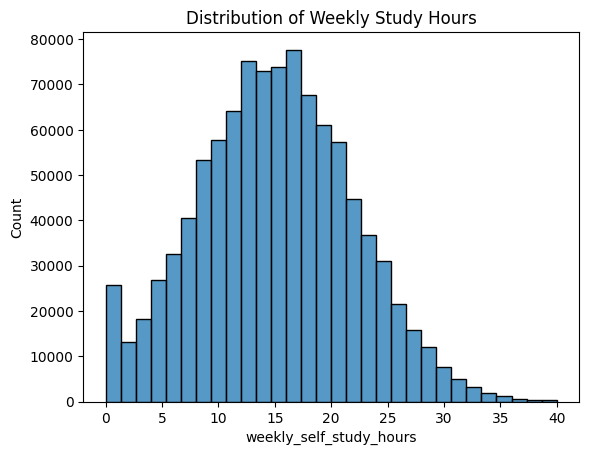

In [328]:
#plotting histogram for distribution of weekly hours
sns.histplot(performance_dataset["weekly_self_study_hours"], bins=30)
plt.title("Distribution of Weekly Study Hours")
plt.show()


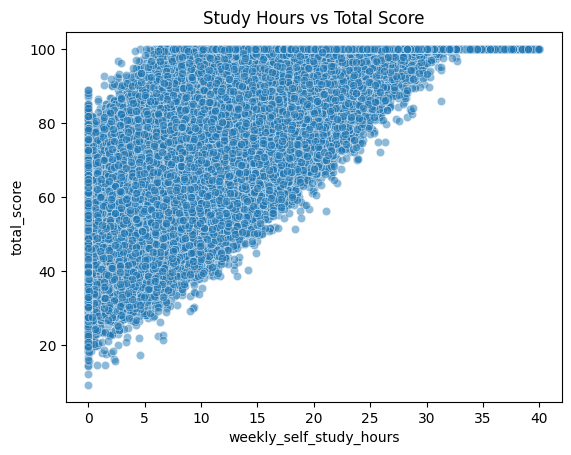

In [329]:
#Plotting study hour vs total score scatterplot
sns.scatterplot(
    x="weekly_self_study_hours",
    y="total_score",
    data=performance_dataset,
    alpha=0.5
)
plt.title("Study Hours vs Total Score")
plt.show()


## Classification Model

In [330]:
X_clf = performance_dataset[[
    "weekly_self_study_hours",
    "attendance_percentage",
    "class_participation"
]]

Y_clf = performance_dataset["final_result"]


### Train and test data split

In [331]:
Xc_train, Xc_test, Yc_train, Yc_test = train_test_split(
    X_clf, Y_clf, test_size=0.2, stratify=Y_clf, random_state=42
)


### Data Standardization

In [332]:
scaler_clf = StandardScaler()

In [333]:
Xc_train_scaled = scaler_clf.fit_transform(Xc_train)
Xc_test_scaled = scaler_clf.transform(Xc_test)
#scaling the data


### Training the model

In [334]:
classifier = LinearSVC(
    class_weight='balanced',
    max_iter=10000
)

In [335]:
#training the support vector machine classifier
classifier.fit(Xc_train_scaled,Yc_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,None


### Model Evalution

#### Accuracy Score

In [336]:
#accuracy score of the training data
Xc_train_predict = classifier.predict(Xc_train_scaled)
training_data_accuracy = accuracy_score(Yc_train,Xc_train_predict)

print('Accuracy score of the training data: ',training_data_accuracy*100,'%')

Accuracy score of the training data:  88.63825 %


In [337]:
#Accuracy score of the testing data
Xc_test_predict = classifier.predict(Xc_test_scaled)
testing_data_accuracy = accuracy_score(Yc_test,Xc_test_predict)

print('Accuracy score of the testing data:',testing_data_accuracy*100,'%')

Accuracy score of the testing data: 88.7055 %


## Making a predictive system

In [338]:
input_data = (4.8,79.9,4.2)   #96,4.8,79.9,4.2,73.6,B,1

input_np = np.array(input_data).reshape(1, -1)



# Score prediction
score_scaled = scaler_rf.transform(input_np)
predicted_score_rf = rf_model.predict(score_scaled)[0]

# Risk prediction
risk_scaled = scaler_clf.transform(input_np)
risk = classifier.predict(risk_scaled)[0]


print(f"Predicted Score: {predicted_score_rf:.2f}")

if risk == 0:
    print("🔧Early Warning: Student needs improvement.")
else:
    print("✅ Student is on the safe side.")




Predicted Score: 65.24
🔧Early Warning: Student needs improvement.


c:\Users\SHAMBHAVI ROY\OneDrive\Documents\MLProject\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\SHAMBHAVI ROY\OneDrive\Documents\MLProject\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [339]:
print(input_np)

[[ 4.8 79.9  4.2]]


### Saving the trained model

In [340]:
import pickle


In [341]:
model_dict={
    'classifier':classifier,
    'rf_regressor':rf_model,
    'scaler_clf':scaler_clf,
    'scaler_rf':scaler_rf
}

In [342]:
filename = 'trained_model.sav'
pickle.dump(model_dict,open(filename,'wb'))

In [343]:

#loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [344]:
loaded_rf = loaded_model['rf_regressor']
loaded_clf = loaded_model['classifier']
loaded_sc = loaded_model['scaler_clf']
loaded_sr = loaded_model['scaler_rf']


In [345]:
input_data = (11.8,82.3,4.6)   #11,11.8,82.3,4.6,66.4,C,0

input_np = np.array(input_data).reshape(1, -1)



# Score prediction
input_rf_scaled = loaded_sr.transform(input_np)

predicted_score_rf = loaded_rf.predict(input_np)[0]

# Risk prediction
input_clf_scaled = loaded_sc.transform(input_np)

risk = loaded_clf.predict(input_np)[0]


print(f"Predicted Score: {predicted_score_rf:.2f}")

if risk == 0:
    print("🔧Early Warning: Student needs improvement.")
else:
    print("✅ Student is on the safe side.")

Predicted Score: 100.00
✅ Student is on the safe side.


c:\Users\SHAMBHAVI ROY\OneDrive\Documents\MLProject\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\SHAMBHAVI ROY\OneDrive\Documents\MLProject\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
